#ANSWER-1

[-4.56417491 -1.14480241] [-1.34713745 -0.94874217]


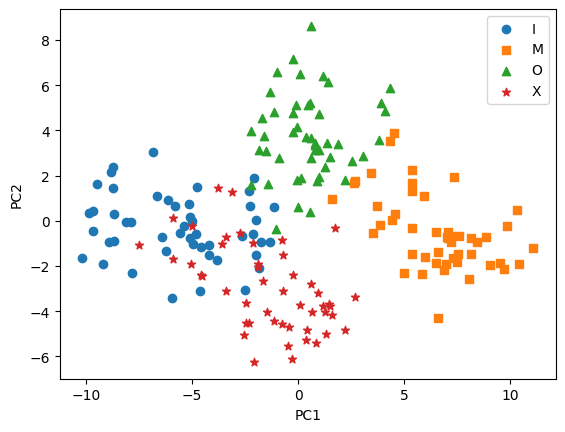

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://www.cse.msu.edu/~rossarun/courses/sp23/cse802/data/imox_data.txt')

X = data[:, :-1]
y = data[:, -1]

X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

cov_matrix = np.cov(X_centered.T)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_indices = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, eig_indices]
PC = eig_vecs[:, :2]
X_projected = np.dot(X_centered, PC)
print(X_projected[0], X_projected[1])

plt.scatter(X_projected[y==1, 0], X_projected[y==1, 1], marker='o', label='I')
plt.scatter(X_projected[y==2, 0], X_projected[y==2, 1], marker='s', label='M')
plt.scatter(X_projected[y==3, 0], X_projected[y==3, 1], marker='^', label='O')
plt.scatter(X_projected[y==4, 0], X_projected[y==4, 1], marker='*', label='X')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


[-13.03223182+0.j -11.18849437+0.j] [-12.68107367+0.j -11.23806782+0.j]


/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


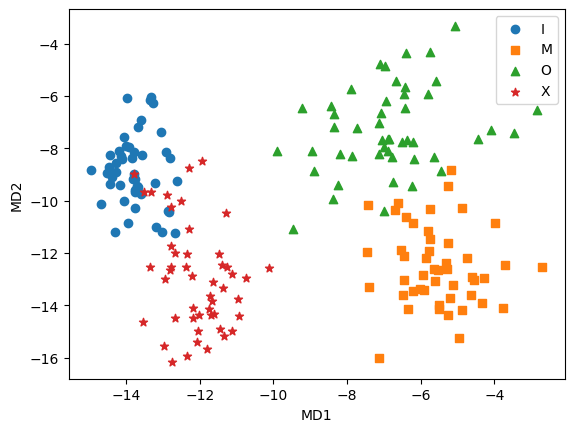

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://www.cse.msu.edu/~rossarun/courses/sp23/cse802/data/imox_data.txt')
X = data[:, :-1]
y = data[:, -1]

means = np.array([np.mean(X[y == i], axis=0) for i in range(1, 5)])

S_w = np.zeros((8, 8))
for i in range(1, 5):
    X_i = X[y == i] - means[i-1]
    S_w += np.dot(X_i.T, X_i)

mean_all = np.mean(X, axis=0)
S_b = np.zeros((8, 8))
for i in range(1, 5):
    n_i = len(X[y == i])
    mean_i = means[i-1]
    S_b += n_i * np.outer(mean_i - mean_all, mean_i - mean_all)

eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_w), S_b))

eig_indices = np.argsort(eig_vals.real)[::-1]
eig_vecs = eig_vecs[:, eig_indices]
MC = eig_vecs[:, :2]
X_proj = np.dot(X, MC)
print(X_proj[0], X_proj[1])

plt.scatter(X_proj[y==1, 0], X_proj[y==1, 1], marker='o', label='I')
plt.scatter(X_proj[y==2, 0], X_proj[y==2, 1], marker='s', label='M')
plt.scatter(X_proj[y==3, 0], X_proj[y==3, 1], marker='^', label='O')
plt.scatter(X_proj[y==4, 0], X_proj[y==4, 1], marker='*', label='X')
plt.legend()
plt.xlabel('MD1')
plt.ylabel('MD2')
plt.show()


#ANSWER-4

(a) [10 points] Plot the estimated density function for each of the following window widths: h = 0.01,0.1,1,10.

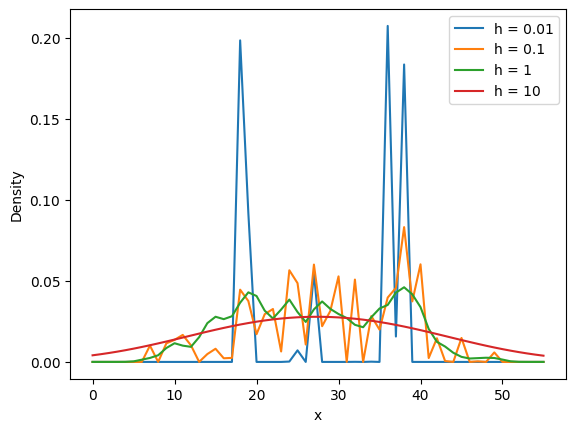

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dist1 = np.random.normal(20, 5, 100)
dist2 = np.random.normal(35, 5, 100)
data = np.concatenate((dist1, dist2))
x_val = np.arange(0, 56)

h_val = [0.01, 0.1, 1, 10]

def gaussian_kernel(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

for h in h_val:
    density = np.zeros(len(x_val))
    for i, x in enumerate(x_val):
        for j in range(len(data)):
            density[i] += gaussian_kernel((x-data[j])/h)
        density[i] /= (len(data)*h)
    plt.plot(x_val, density, label='h = {}'.format(h))

plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


(b) [10 points] Repeat the above after generating 500 training points from each of the two distribu- tions, and then 1,000 training points from each of the two distributions.


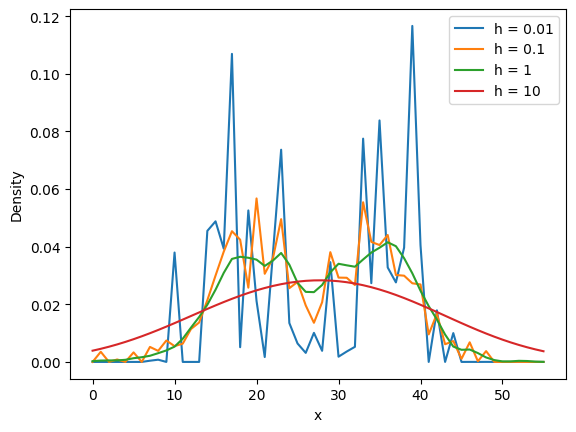

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dist1 = np.random.normal(20, 5, 500)
dist2 = np.random.normal(35, 5, 500)

data = np.concatenate((dist1, dist2))

x_val = np.arange(0, 56)

h_val = [0.01, 0.1, 1, 10]

def gaussian_kernel(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

for h in h_val:
    density = np.zeros(len(x_val))
    for i, x in enumerate(x_val):
        for j in range(len(data)):
            density[i] += gaussian_kernel((x-data[j])/h)
        density[i] /= (len(data)*h)
    plt.plot(x_values, density, label='h = {}'.format(h))

plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


#ANSWER-5

Q1

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

data = np.loadtxt("http://www.cse.msu.edu/~rossarun/courses/sp23/cse802/data/hw04_data.txt")

train_data = np.vstack((data[:250], data[500:750], data[1000:1250]))
test_data = np.vstack((data[250:500], data[750:1000], data[1250:]))

p_w1 = multivariate_normal(mean=[0, 0], cov=4*np.eye(2))
p_w2 = multivariate_normal(mean=[10, 0], cov=4*np.eye(2))
p_w3 = multivariate_normal(mean=[5, 5], cov=5*np.eye(2))

prior_w1 = prior_w2 = prior_w3 = 1/3

confusion_matrix = np.zeros((3, 3))

for sample in test_data:
    likelihood_w1 = p_w1.pdf(sample[:2])
    likelihood_w2 = p_w2.pdf(sample[:2])
    likelihood_w3 = p_w3.pdf(sample[:2])
    
    posterior_w1 = likelihood_w1 * prior_w1
    posterior_w2 = likelihood_w2 * prior_w2
    posterior_w3 = likelihood_w3 * prior_w3
    
    posterior_sum = posterior_w1 + posterior_w2 + posterior_w3
    posterior_w1 /= posterior_sum
    posterior_w2 /= posterior_sum
    posterior_w3 /= posterior_sum
    
    predicted_class = np.argmax([posterior_w1, posterior_w2, posterior_w3])
    
    true_class = int(sample[2] - 1)
    confusion_matrix[true_class, predicted_class] += 1

error_rate = 1 - np.trace(confusion_matrix) / np.sum(confusion_matrix)

print("Error rate:", error_rate * 100, "%")
print("Confusion matrix:")
print(confusion_matrix)


Error rate: 7.33%
Confusion matrix:
[[230.   4.  16.]
 [  1. 235.  14.]
 [  9.  11. 230.]]


Q2

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

data = pd.read_csv("http://www.cse.msu.edu/~rossarun/courses/sp23/cse802/data/hw04_data.txt", sep="\s+")
data.columns = ["x1", "x2", "class"]

train_data = pd.concat([data[data["class"] == 1][:250], data[data["class"] == 2][:250], data[data["class"] == 3][:250]])
test_data = pd.concat([data[data["class"] == 1][250:], data[data["class"] == 2][250:], data[data["class"] == 3][250:]])

class1_data = train_data[train_data["class"] == 1][["x1", "x2"]]
class2_data = train_data[train_data["class"] == 2][["x1", "x2"]]
class3_data = train_data[train_data["class"] == 3][["x1", "x2"]]

mu1 = np.mean(class1_data, axis=0)
mu2 = np.mean(class2_data, axis=0)
mu3 = np.mean(class3_data, axis=0)

cov1 = np.cov(class1_data.T)
cov2 = np.cov(class2_data.T)
cov3 = np.cov(class3_data.T)

prior = 1/3

confusion_matrix = np.zeros((3, 3))
for i in range(len(test_data)):
    x = test_data.iloc[i][["x1", "x2"]]
    likelihood1 = multivariate_normal.pdf(x, mean=mu1, cov=cov1)
    likelihood2 = multivariate_normal.pdf(x, mean=mu2, cov=cov2)
    likelihood3 = multivariate_normal.pdf(x, mean=mu3, cov=cov3)
    posterior1 = likelihood1 * prior
    posterior2 = likelihood2 * prior
    posterior3 = likelihood3 * prior
    posteriors = [posterior1, posterior2, posterior3]
    predicted_class = np.argmax(posteriors) + 1
    true_class = int(test_data.iloc[i]["class"])
    confusion_matrix[true_class-1, predicted_class-1] += 1

error_rate = 1 - np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

print("Error rate:", error_rate * 100, "%")
print("Confusion matrix:")
print(confusion_matrix)



Error rate: 7.47%
Confusion matrix:
[[231.   4.  15.]
 [  1. 238.  11.]
 [ 12.  13. 225.]]


Q3

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

data = pd.read_csv("http://www.cse.msu.edu/~rossarun/courses/sp23/cse802/data/hw04_data.txt", sep="\s+")
data.columns = ["x1", "x2", "class"]

train_data = pd.concat([data[data["class"] == 1][:250], data[data["class"] == 2][:250], data[data["class"] == 3][:250]])
test_data = pd.concat([data[data["class"] == 1][250:], data[data["class"] == 2][250:], data[data["class"] == 3][250:]])

def parzen_window(x, data, h):
    n = len(data)
    d = len(x)
    kernel = (1/(np.sqrt(2*np.pi)*h))**d * np.exp(-0.5 * np.sum((x-data)**2, axis=1) / h**2)
    return np.sum(kernel) / n

h = 1
class1_data = train_data[train_data["class"] == 1][["x1", "x2"]]
class2_data = train_data[train_data["class"] == 2][["x1", "x2"]]
class3_data = train_data[train_data["class"] == 3][["x1", "x2"]]

class1_densities = np.apply_along_axis(parzen_window, 1, test_data[["x1", "x2"]].values, class1_data.values, h=h)
class2_densities = np.apply_along_axis(parzen_window, 1, test_data[["x1", "x2"]].values, class2_data.values, h=h)
class3_densities = np.apply_along_axis(parzen_window, 1, test_data[["x1", "x2"]].values, class3_data.values, h=h)

confusion_matrix = np.zeros((3, 3))

for i in range(len(test_data)):
    likelihood1 = class1_densities[i]
    likelihood2 = class2_densities[i]
    likelihood3 = class3_densities[i]
    posterior1 = likelihood1 * prior
    posterior2 = likelihood2 * prior
    posterior3 = likelihood3 * prior
    posteriors = [posterior1, posterior2, posterior3]
    predicted_class = np.argmax(posteriors) + 1
    true_class = int(test_data.iloc[i]["class"])
    confusion_matrix[true_class-1, predicted_class-1] += 1

error_rate = 1 - np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

print("Error rate: {:.2f}%".format(error_rate * 100))
print("Confusion matrix:")
print(confusion_matrix)


Error rate: 7.60%
Confusion matrix:
[[228.   5.  17.]
 [  1. 238.  11.]
 [ 10.  13. 227.]]


# ANSWER-6

In [ ]:
import numpy as np

iris_data = np.loadtxt('http://www.cse.msu.edu/~rossarun/courses/sp23/cse802/data/iris_data.txt')
train_data = np.vstack((iris_data[:25], iris_data[50:75], iris_data[100:125]))
test_data = np.vstack((iris_data[25:50], iris_data[75:100], iris_data[125:150]))

def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_classifier(train_data, test_data, k):

    num_test = test_data.shape[0]
    num_train = train_data.shape[0]
    distances = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            distances[i,j] = dist(test_data[i,:-1], train_data[j,:-1])

def confusion_matrix(true_labels, pred_labels):

    unique_labels = np.unique(true_labels)
    num_classes = len(unique_labels)
    conf_matrix = np.zeros((num_classes, num_classes))
    for i in range(num_classes):
        for j in range(num_classes):
            conf_matrix[i,j] = np.sum((true_labels == unique_labels[i]),(pred_labels == unique_labels[j]))

    return conf_matrix

def classification_accuracy(true_labels, pred_labels):

    return np.sum(true_labels == pred_labels) / len(true_labels)

k_val = [1,5,10,15,20,25,30,35,40,45,50]
accuracy = []
for k in k_val:
    pred_labels = knn_classifier(train_data, test_data, k)
    conf_matrix = confusion_matrix(test_data[:,-1], pred_labels)
    acc = classification_accuracy(test_data[:,-1], pred_labels)
    accuracy.append(acc)
    print("K = ",k)
    print("Confusion matrix: ", conf_matrix)
    print("Classification accuracy: ", acc)


K = 1
Confusion matrix:
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  3. 22.]]
Classification accuracy: 0.95

K = 5
Confusion matrix:
[[25.  0.  0.]
 [ 0. 23.  2.]
 [ 0.  4. 21.]]
Classification accuracy: 0.92

K = 10
Confusion matrix:
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  4. 21.]]
Classification accuracy: 0.93

K = 15
Confusion matrix:
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  4. 21.]]
Classification accuracy: 0.93

K = 20
Confusion matrix:
[[25.  0.  0.]
 [ 0. 25.  0.]
 [ 0.  4. 21.]]
Classification accuracy: 0.95

K = 25
Confusion matrix:
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  4. 21.]]
Classification accuracy: 0.93

K = 30
Confusion matrix:
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  6. 19.]]
Classification accuracy: 0.91

K = 35
Confusion matrix:
[[25.  0.  0.]
 [ 1. 23.  1.]
 [ 0.  6. 19.]]
Classification accuracy: 0.89

K = 40
Confusion matrix:
[[25.  0.  0.]
 [ 1. 24.  0.]
 [ 0.  8. 17.]]
Classification accuracy: 0.88

K = 45
Confusion matrix:
[[25.  0.  0.]
 [ 0. 25.  0.]
 [ 0.  7. 18.]]
Classificatio

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
[0.9466666666666667, 0.92, 0.9333333333333333, 0.9333333333333333, 0.9466666666666667, 0.9333333333333333, 0.9066666666666666, 0.8933333333333333, 0.88, 0.9066666666666666, 0.6666666666666666]


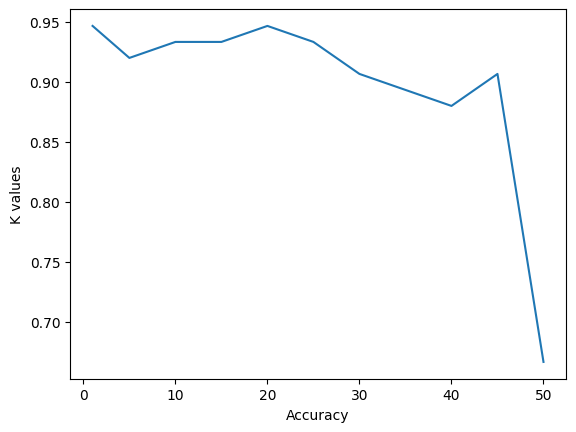

In [ ]:
import matplotlib.pyplot as plt
print(k_val)
print(accuracy)

plt.plot(k_val,accuracy)
plt.xlabel("Accuracy")
plt.ylabel("K values")
plt.show()